In [1]:
import pandas as pd

In [169]:
meteo=pd.read_csv("meteo.csv", parse_dates=["date"],index_col=0)
meteo

,temp,prec,hum
date,,,
1966-01-01,-8.6,4.0,74.0
1966-01-02,-4.7,7.3,88.0
1966-01-03,-3.4,2.3,91.0
1966-01-04,-8.9,0.5,76.0
1966-01-05,-13.4,0.0,77.0
...,...,...,...
2008-12-27,2.0,0.0,92.0
2008-12-28,-3.2,0.0,96.0
2008-12-29,0.8,0.0,91.0


In [171]:
meteo=meteo.loc["1988":"1993"]
meteo["PSum"]=meteo["prec"].cumsum()
meteo

,temp,prec,hum,PSum
date,,,,
1988-01-01,-4.8,7.1,78.0,7.1
1988-01-02,2.7,9.9,100.0,17.0
1988-01-03,5.0,3.5,94.0,20.5
1988-01-04,4.2,1.2,95.0,21.7
1988-01-05,2.9,5.9,97.0,27.6
...,...,...,...,...
1993-12-27,-0.5,2.9,100.0,3947.4
1993-12-28,-1.8,0.0,96.0,3947.4
1993-12-29,-2.5,0.0,96.0,3947.4


In [172]:
def relMitrumsToDeficits(row):
    t=row[0]
    h=row[2]
    return (math.exp((17.3*t)/(t+237.3))*6.11)*(1-(h/100))
    #for t, h,date in zip(self.temperature, self.humidity,self.meteoDate):

        #self.humidityDef.append((math.exp((17.3*t)/(t+237.3))*6.11)*(1-(h/100)))

In [173]:
meteo["relHum"]=meteo.apply(relMitrumsToDeficits,axis=1)
meteo

,temp,prec,hum,PSum,relHum
date,,,,,
1988-01-01,-4.8,7.1,78.0,7.1,0.940482
1988-01-02,2.7,9.9,100.0,17.0,0.000000
1988-01-03,5.0,3.5,94.0,20.5,0.523882
1988-01-04,4.2,1.2,95.0,21.7,0.412741
1988-01-05,2.9,5.9,97.0,27.6,0.225877
...,...,...,...,...,...
1993-12-27,-0.5,2.9,100.0,3947.4,0.000000
1993-12-28,-1.8,0.0,96.0,3947.4,0.214129
1993-12-29,-2.5,0.0,96.0,3947.4,0.203285


In [174]:
def snow(SSBC, SSBSK, SSEC, SSESK, RS, ES, P, T, DEF, CMELT, KS, T1, T2, WMELT, WRFR, WHC, WHT, CFR, ESUM, KOP, IZTV, SSBC1):
        if  ( SSBC > 0.001 or T <= T2 ) :
            ES = KS * DEF
            ESUM = ESUM + ES
            SSBSK = SSBSK - ES
            IZTV = 0
            SSBC = SSBC + P
            if  ( SSBSK < 0 ) :
                IZTV = SSBSK
                SSBC = SSBC + IZTV
                IZTV = 0
                SSBSK = 0
            if  ( SSBC < 0 ) :
                ESUM = ESUM + SSBC
                ES = 0.0001
                IZTV = 0
                SSBC = 0
            DT2 = T - T2
            if  ( DT2 <= 0 ) :
                WMELT = 0
                SSEC = SSBC
                WHT = SSEC * WHC
                if  ( SSBSK > 0 ) :
                    if  ( SSBSK > 0 ) :
                        WRFR = CMELT *  ( T2 - T )  * CFR
                    if  ( SSBSK < WRFR ) :
                        WRFR = SSBSK
                        SSESK = 0
                        SSBC = SSBC + WRFR
                    else:
                        SSESK = SSBSK - WRFR
                        if  ( SSESK > WHT ) :
                            RS = SSBSK - WHT
                        else:
                            RS = 0
                            SSEC = SSBC + WRFR
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                            D=dict(SSBC=SSBC, SSBSK=SSBSK, SSEC=SSEC, SSESK=SSESK, RS=RS, ES=ES, KS=KS, WMELT=WMELT, WRFR=WRFR, WHC=WHC, WHT=WHT, CFR=CFR, ESUM=ESUM, KOP=KOP, IZTV=IZTV, SSBC1=SSBC1)
                            return D
                        if  ( RS >= 0 ) :
                            SSESK = WHT
                            SSEC = SSBC + WRFR
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                        else:
                            RS = 0
                            SSESK = WHT + RS
                            SSEC = SSBC + WRFR
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                SSESK = 0
                RS = 0
                SSEC = SSBC
                if  ( SSEC <= 0 ) :
                    if  ( ES <= 0 ) :
                        ES = 0.0001
            else:
                DT1 = T - T1
                if  ( DT1 < 0 ) :
                    if  ( T >= T2 and P > 0 ) :
                        WMELT = 0
                        SSEC = SSBC
                        WHT = SSEC * WHC
                        if  ( SSBSK > WHT ) :
                            RS = SSBSK - WHT
                        else:
                            RS = 0
                            SSESK = SSBSK
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                            D=dict(SSBC=SSBC, SSBSK=SSBSK, SSEC=SSEC, SSESK=SSESK, RS=RS, ES=ES, KS=KS, WMELT=WMELT, WRFR=WRFR, WHC=WHC, WHT=WHT, CFR=CFR, ESUM=ESUM, KOP=KOP, IZTV=IZTV, SSBC1=SSBC1)
                            return D
                        
                        if  ( RS >= 0 ) :
                            SSESK = WHT
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                        else:
                            RS = 0
                            SSESK = WHT + RS
                            if  ( SSEC <= 0 ) :
                                if  ( ES <= 0 ) :
                                    ES = 0.0001
                    else:
                        if  ( T >= T2 and P == 0 ) :
                            WMELT = CMELT *  ( T - T2 )
                WMELT = CMELT *  ( T - T2 )
                SSBC1 = SSBC - P
                if  ( WMELT > SSBC1 ) :
                    WMELT = SSBC - P
                if  ( WMELT < 0 ) :
                    WMELT = 0
                SSEC = SSBC - WMELT - P
                if  ( SSEC <= 0 ) :
                    SSEC = 0
                WHT = SSEC * WHC
                KOP = SSBSK + WMELT + P
                if  ( SSBSK > WHT ) :
                    SSESK = WHT
                    RS = WMELT + P -  ( WHT - SSBSK )
                    if  ( RS <= 0 ) :
                        RS = 0
                else:
                    if  ( KOP > WHT ) :
                        SSESK = WHT
                        RS = WMELT + P -  ( WHT - SSBSK )
                    else:
                        SSESK = SSBSK + WMELT + P
                        RS = 0
        else:
            WRFR = 0
            WHT = 0
            KOP = 0
            IZTV = 0
            SSBC1 = 0
            SSEC = 0
            SSBC = 0
            SSBSK = 0
            SSESK = 0
            ES = 0
            RS = P
            WMELT = 0
        D=dict(SSBC=SSBC, SSBSK=SSBSK, SSEC=SSEC, SSESK=SSESK, RS=RS, ES=ES, KS=KS, WMELT=WMELT, WRFR=WRFR, WHC=WHC, WHT=WHT, CFR=CFR, ESUM=ESUM, KOP=KOP, IZTV=IZTV, SSBC1=SSBC1)
        return D

In [229]:
SSER = 0
SMSER = 0
WZER = 100
        
SSBC = SSER
SMSB = SMSER
WZB = WZER
SSEC = SSER
SMSE = SMSER
WZE = WZER
SSBSK = 0
SSESK = 0

RS=0
ES=0
WMELT=0
WRFR=0
WHT=0
ESUM=0
KOP=0
IZTV=0
SSBC1=0
       
params=[80,0.046,320,0.05,0.0064,0.55,0.2,2,0.5,-1,0.2,122,269,8,1,12,6,1.5,0.1,1.2,2,10]
    
WMAX=float(params[0])
ALFA=float(params[1])
ZCAP=float(params[2])
A2=float(params[3])
A3=float(params[4])
KU=float(params[5])
KL=float(params[6])
CMELT=float(params[7])
T1=float(params[8])
T2=float(params[9])
KS=float(params[10])
DZ=float(params[11])
PZ=float(params[12])
RCHROB=float(params[13])
RCHROBZ =float(params[14])
RCHROB2 = float(params[15])
RCHROB2Z = float(params[16])
ROBK = float(params[17])       
WHC = float(params[18])
CFR=float(params[19])
BETA=float(params[20])
DPERC=float(params[21])

    
        
#result=pd.DataFrame(columns=["Date","SSBC","SSBSK","SSEC","SSESK","RS","ES"])
result=[]
for date, each in zip(meteo.index, meteo.values):
    T=each[0]
    P=each[1]
    DEF=each[4]
    
    D_SNOW = snow(SSBC,SSBSK,SSEC,SSESK,RS,ES,P,T,DEF,CMELT,KS,T1,T2,WMELT,WRFR,WHC,WHT,CFR,ESUM,KOP,IZTV,SSBC1)           
            
    SSBC=D_SNOW['SSBC']
    SSBSK=D_SNOW['SSBSK']
    SSEC=D_SNOW['SSEC']
    SSESK=D_SNOW['SSESK']
    RS=D_SNOW['RS']
    ES=D_SNOW['ES']
    
    WMELT=D_SNOW['WMELT']
    WRFR=D_SNOW['WRFR']
    WHC=D_SNOW['WHC']
    WHT=D_SNOW['WHT']
    ESUM=D_SNOW['ESUM']
    KOP=D_SNOW['KOP']
    IZTV=D_SNOW['IZTV']
    SSBC1=D_SNOW['SSBC1']
    
    SSBC = SSEC     #sniega sega
    SSBSK = SSESK   #sniega sega
    SMSB = SMSE     #aktiivaa zona
    WZB = WZE       #piesaatinaataa zona
    
    result.append([date,SSBC,SSBSK,SSEC])

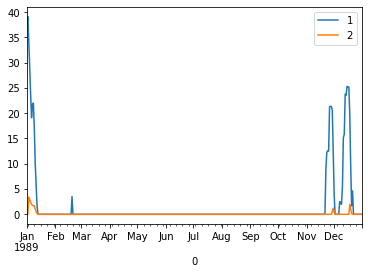

In [242]:
result=pd.DataFrame(result)
result=result.set_index(pd.DatetimeIndex(result[0]))
result[[1,2]].loc["1989"].plot()
#result
#pd.DatetimeIndex(result[0])